In [13]:
"""
Scenario: AI Model for Detecting Defective Products in a Factory

A manufacturing company wants to build an AI system that detects defective products from camera images on the production line.

They have collected 100 product images, and each image is labeled as:

0 → Non-defective product

1 → Defective product

To build a reliable AI model, the data scientist must divide the dataset into three parts:

Training set (70%) → Used to train the AI model

Validation set (15%) → Used to tune and improve the model

Test set (15%) → Used to evaluate final performance

Your task is to help the data scientist split the dataset correctly.
"""

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("housing_dataset - Sheet1.csv")

x = df[['size','bedrooms','bathrooms','age','location']]
y = df['price']

# Step 1: 15% test
x_temp, x_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42
)

# Step 2: split remaining 85% into 70% train, 15% val
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.1765, random_state=42
)

print(f"Training set: {len(x_train)} samples")
print(f"Validation set: {len(x_val)} samples")
print(f"Test set: {len(x_test)} samples")

Training set: 6 samples
Validation set: 2 samples
Test set: 2 samples


In [15]:
"""
Scenario: AI System for Music Genre Classification

A music streaming company wants to build an AI model that automatically identifies the genre of songs (for example: Rock, Pop, Classical, etc.).

They have collected 100 audio clips, and each clip has already been labeled with its correct genre. To build a reliable AI model, the data science team must divide the dataset into three parts:

Training set (70%) → Used to teach the AI model patterns in music

Validation set (15%) → Used to tune model parameters and improve accuracy

Test set (15%) → Used to evaluate how well the model works on completely new songs

You are the AI engineer responsible for preparing the dataset.
"""
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_csv("music_genre_dataset.csv")

# Define Features (X) and Target (y)
X = df[['duration_seconds','tempo_bpm','energy']]
y = df['genre_label']

# Step 1: 70% Train, 30% Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 2: Split 30% Temp into 15% Validation and 15% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Print dataset sizes
print("Training set size :", len(X_train))
print("Validation set size :", len(X_val))
print("Test set size :", len(X_test))

# Print percentage check
total = len(df)
print("\nPercentage Distribution:")
print("Training % :", round(len(X_train)/total * 100, 2))
print("Validation % :", round(len(X_val)/total * 100, 2))
print("Test % :", round(len(X_test)/total * 100, 2))


KeyError: "['energy'] not in index"

Dataset:

   Area_sqft  Price_lakhs
0        600           30
1        800           40
2       1000           50
3       1200           60
4       1400           68
5       1600           75
6       1800           85
7       2000           95
8       2200          105
9       2500          120

Slope (m): 0.046402590931738916
Intercept (b): 2.6910812157448873

Actual vs Predicted:

Actual: 105.00, Predicted: 104.78
Actual: 40.00, Predicted: 39.81

Mean Absolute Error: 0.205
R2 Score: 0.99996

Predicted price for 1800 sqft house: Rs 86.22 lakhs


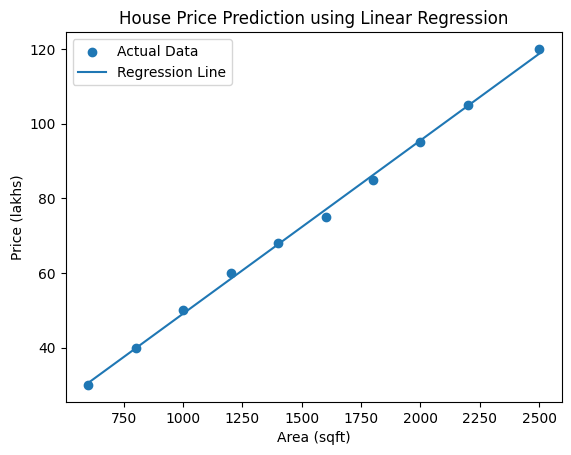

In [20]:
# Scenario: Predicting House Prices Based on Area

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Create Dataset
data = {
    "Area_sqft": [600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2500],
    "Price_lakhs": [30, 40, 50, 60, 68, 75, 85, 95, 105, 120]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

# Define Features (X) and Target (y)
X = df[["Area_sqft"]]
y = df["Price_lakhs"]   # 1D target (best practice)

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Print Model Parameters
print("\nSlope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Make Predictions on Test Set
y_pred = model.predict(X_test)

print("\nActual vs Predicted:\n")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", round(mae, 4))
print("R2 Score:", round(r2, 6))

# Predict New House Price (1800 sqft)
new_area = pd.DataFrame([[1800]], columns=["Area_sqft"])
predicted_price = model.predict(new_area)[0]

print(f"\nPredicted price for 1800 sqft house: Rs {predicted_price:.2f} lakhs")

# Visualization
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (lakhs)")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.show()

Dataset:

   Experience_years  Salary_lpa
0               0.5         3.0
1               1.0         3.5
2               2.0         4.5
3               3.0         5.2
4               4.0         6.0

Slope (m): 0.7623129251700681
Intercept (b): 2.8900680272108836

Actual vs Predicted:

Actual: 6.80, Predicted: 6.70
Actual: 3.00, Predicted: 3.27
Actual: 10.50, Predicted: 10.51

Mean Absolute Error: 0.128
R2 Score: 0.997

Predicted salary for 5 years experience: 6.70 LPA


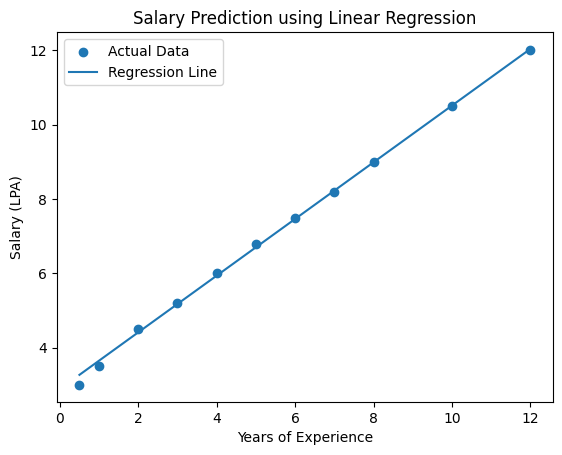

In [25]:
# Predicting Employee Salary Based on Experience

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("salary_lpa - Sheet1.csv")

print("Dataset:\n")
print(df.head())

# Define Features and Target (FIXED)
X = df[["Experience_years"]]
y = df["Salary_lpa"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nSlope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Predict
y_pred = model.predict(X_test)

print("\nActual vs Predicted:\n")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", round(mae, 3))
print("R2 Score:", round(r2, 4))

# Predict new salary (example: 5 years experience)
new_exp = pd.DataFrame([[5]], columns=["Experience_years"])
predicted_salary = model.predict(new_exp)[0]

print(f"\nPredicted salary for 5 years experience: {predicted_salary:.2f} LPA")

# Visualization
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (LPA)")
plt.title("Salary Prediction using Linear Regression")
plt.legend()
plt.show()